In [4]:
#Część 1

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

# Zobaczmy jak wyglądają elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(iris['data'][0]))
print('Kilka pierwszych elementów:')
print(iris['data'][0:5])

# Kwiaty mają swoje etykiety numeryczne...
print('Pierwszy kwiat w zbiorze to: ', iris['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwszy kwiat w zbiorze (słownie) to: ', iris['target_names'][0])

# Etykiety które występują
print('Cechy irysów w zbiorze to: ', iris['feature_names'])

print("\n")


Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Pierwszy kwiat w zbiorze to:  0
Pierwszy kwiat w zbiorze (słownie) to:  setosa
Cechy irysów w zbiorze to:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [7]:
print("Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.")
print("Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych")
print("\n")
print("Opis możemy wyświetlić na dwa sposoby, albo używając iris[\'DESCR\'], albo iris.DESCR\n")
print("Opis: ", iris['DESCR'])
print("\n")
print("Wyświetlany jest opis Iris plants dataset. Możemy tam znaleźć informacje takie jak: Data Set Characteristics, czyli informacje o cechach (wymiary kielicha/płatka) i klasach (gatunkach), Summary Statistics, czyli statystyki takie jak min, max, średnia, średnie odchylenie i współczynnik korelacji Pearsona i inne. Jest to najpopularniejsza baza danych, wykorzystywana jako wzorzec rozpoznawania tekstu.")
print("\n")
print("Baza Irysy: DESCR (opis danych), data (dane), feature_names (nazwy cech irysów), target (numery odpowiadające gatunkowi) i target_names (nazwy gatunków)")
print("\n")

Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych


Opis możemy wyświetlić na dwa sposoby, albo używając iris['DESCR'], albo iris.DESCR

Opis:  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0

Zobrazowanie zbioru danych, czyli narysowanie wykresu, który dla każdego przykładu, zestawi każdą parę cech:


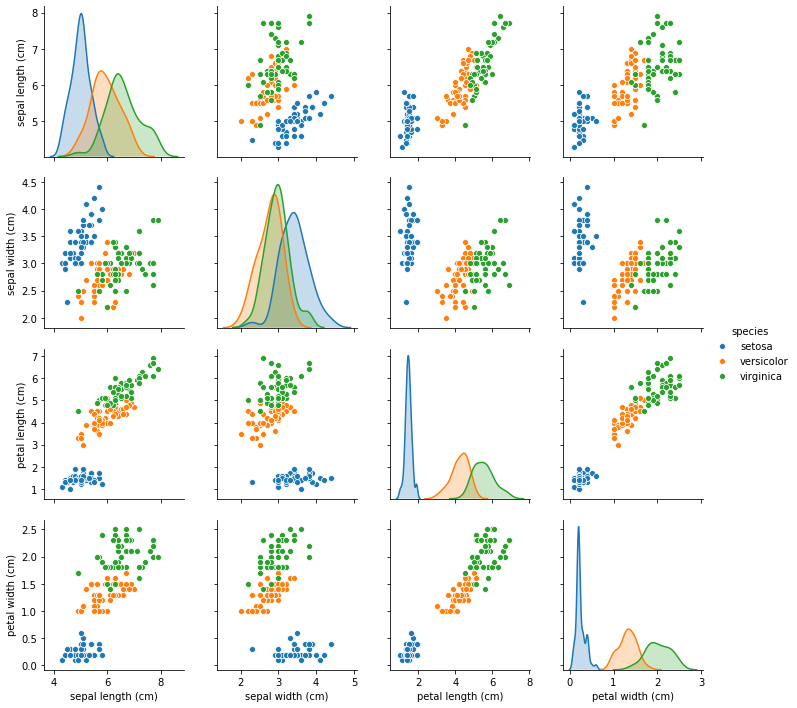



Z wykresu można wyczytać, że Setosa ma charakterystyczne wymiary, natomiast ciężko będzie odróżnić większe kwiaty Versicolort od mniejszych Virginici.


Zobaczmy jak naocznie wyglądają dane dla 20 elementów:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [16]:
print("Zobrazowanie zbioru danych, czyli narysowanie wykresu, który dla każdego przykładu, zestawi każdą parę cech:")
# konwersja na obiekt pandas.DataFrame
# Kolumnami będą nazwy cech
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku, w tym celu mapujemy każdy element tablicy z gatunkami na jego nazwę
targets = map(lambda x: iris['target_names'][x], iris['target'] )
# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))
# wykres
sns.pairplot(iris_df, hue='species')
plt.show()
print("\n")
print("Z wykresu można wyczytać, że Setosa ma charakterystyczne wymiary, natomiast ciężko będzie odróżnić większe kwiaty Versicolort od mniejszych Virginici.")
print("\n")
print("Zobaczmy jak naocznie wyglądają dane dla 20 elementów:")
iris_df.head(20)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Konwencja, często spotykana w dokumentacji sklearn to X dla cech oraz y dla etykiet
X = iris.data
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze - zaskoczenie - uczącym
knn.fit(X_train, y_train)

# Przewidujemy wartości dla zbioru testowego
y_pred = knn.predict(X_test)

# Sprawdzamy kilka pierwszych wartości przewidzianych
print("Kilka pierwszych gatunków przewidzianych: ", y_pred[:5])

# Sprawdzamy dokładność klasyfikatora
print("Dokładność klasyfikatora: ", knn.score(X_test, y_test))

X_new = np.array([[5.1, 2.8, 1.1, 0.3]])
print("\n")
print("Tworzę nową próbkę: ", X_new)
y_pred_new = knn.predict(X_new)
print("Wynik klasyfikacji: ", y_pred_new)
print("Model sklasyfikował próbkę jako gatunek: ", iris['target_names'][int(y_pred_new)])

Kilka pierwszych gatunków przewidzianych:  [0 2 0 2 0]
Dokładność klasyfikatora:  0.9333333333333333


Tworzę nową próbkę:  [[5.1 2.8 1.1 0.3]]
Sprawdzam wynik klasyfikacji:  [0]
Model sklasyfikował próbkę jako gatunek:  setosa


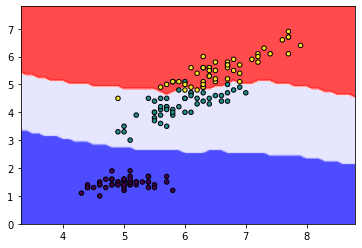

In [26]:
# Na przykładzie dwóch cech sprawdźmy jakie są granice decyzyjne

%matplotlib inline

# Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Uczymy klasyfikator na tylko dwóch wybranych cechach
knn.fit(X_train[:, [0, 2]], y_train)

# Przewidujemy każdy punkt na płaszczyźnie
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tworzymy contourplot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

In [2]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy

lista_n = [] #tworzymy n klasyfikatorów
dokladnosci = []

lista_n = [1,2,3,4,5,6,7,8,9,10]

for n_neighb in lista_n:
    knn = KNeighborsClassifier(n_neighbors = n_neighb)
    knn.fit(X_train, y_train)
    dokladnosc = knn.score(X_test,y_test)
    dokladnosci.append(dokladnosc)

print("Poniższy wykres przedstawia zależność pomiędzy ilością sąsiadów, a dokładnością klasyfikatora.")
plt.title('Zależność dokładności klasyfikatora od ilości sąsiadów')
plt.ylabel('Dokładność klasyfikatora');
plt.xlabel('k - sąsiadów');
plt.plot(lista_n,dokladnosci);
plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In [59]:
# Część 2

Elementy zbioru:  ['data', 'target', 'target_names', 'images', 'DESCR']
Typ pierwszego elementu z 'images':  <class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Pierwsza cyfra w zbiorze to:  0


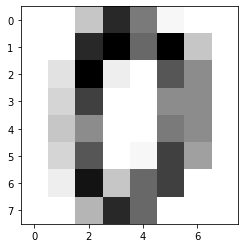

In [57]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytaj przykładowy zbiór danych - cyfry odręczne z MNIST
digits = datasets.load_digits()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(digits.keys()))

# Każda cyfra to po prostu macierz 8x8
print('Typ pierwszego elementu z \'images\': ', type(digits['images'][0]))
print(digits['images'][0])

# Cyfry mają swoje etykiety
print('Pierwsza cyfra w zbiorze to: ', digits['target'][0])

# Możemy też wyświetlić dwuwymiarową macierz jako obrazek, za pomocą imshow
plt.imshow(digits.images[0], cmap=plt.cm.Greys)
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Trzymamy się konwencji, X dla cech oraz y dla etykiet
X = digits.data
y = digits.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze uczącym
knn.fit(X_train, y_train)

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

0.9888888888888889


In [98]:
# Sprawdźmy coś więcej niż dokładność
# na początek zapiszmy wyniki predykcji

y_pred = knn.predict(X_test)
print("Wynik klasyfikacji: \n", y_pred)

Wynik klasyfikacji: 
 [0 2 0 2 0 1 1 1 0 1 0 1 1 2 0 1 1 2 2 0 0 2 2 2 2 2 0 2 1 2 1 0 2 0 1 1 1
 1 0 2 2 0 0 2 0]


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# Jak bardzo wyniki różnią się od prawdziwych wartości?

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Z danych wynika, że jest 15 elementow")
print("True positive: 13")
print("False Positive: 2")
print("False Negative: 1")
print("True Negative: 14")
print("Dokładność: 93%")

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Z poniższych danych wynika, że mamy w sumie 15 elementów.
Prawdziwie pozytywnych (TP): 13
Fałszywie pozytywnych (FP): 2
Fałszywie negatyenych (FN): 1
Prawdziwie negatyenych (TN): 14
Dokładność jest na poziomie 93%


In [94]:

# Opisy różnych metryk znajdziesz tutaj:
# https://en.wikipedia.org/wiki/Confusion_matrix
# Od biedy:
# https://pl.wikipedia.org/wiki/Tablica_pomyłek

In [91]:
# Klasyfikatory potrafią określać również prawdopodobieństwo przynależności do konkretnej klasy

y_pred_proba = knn.predict_proba(X_test)
print("Wyniki klasyfikacji dla kilku pierwszych wartości: ", y_pred_proba[:10])

Wyniki klasyfikacji dla kilku pierwszych wartości:  [[1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]]


In [51]:
# Część 3

In [99]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Wypisz raport z uczenia: confusion_matrix oraz classification_report

In [135]:
print("BADANIE ZBIORU DANYCH: wine.\n")
# Wczytuję zbiór danych.
wine = datasets.load_wine()
# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(wine.keys()))

# Zobaczmy jak wyglądają elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(wine['data'][0]))
print('Kilka pierwszych elementów:')
print(wine['data'][0:5])

# Wina mają swoje etykiety numeryczne...
print('Pierwsze wino w zbiorze to: ', wine['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwsze wino w zbiorze (słownie) to: ', wine['target_names'][0])

# Etykiety które występują
print('Cechy wina w zbiorze to: ', wine['feature_names'])

BADANIE ZBIORU DANYCH: wine.

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Pierwsze wino w zbiorze to:  0
Pierwsze wino w zbiorze (słownie) to:  class_0
Cechy wina w zbiorze to:  ['alcohol', 'malic_acid'

ZOBRAZOWANIE ZBIORU DANYCH:


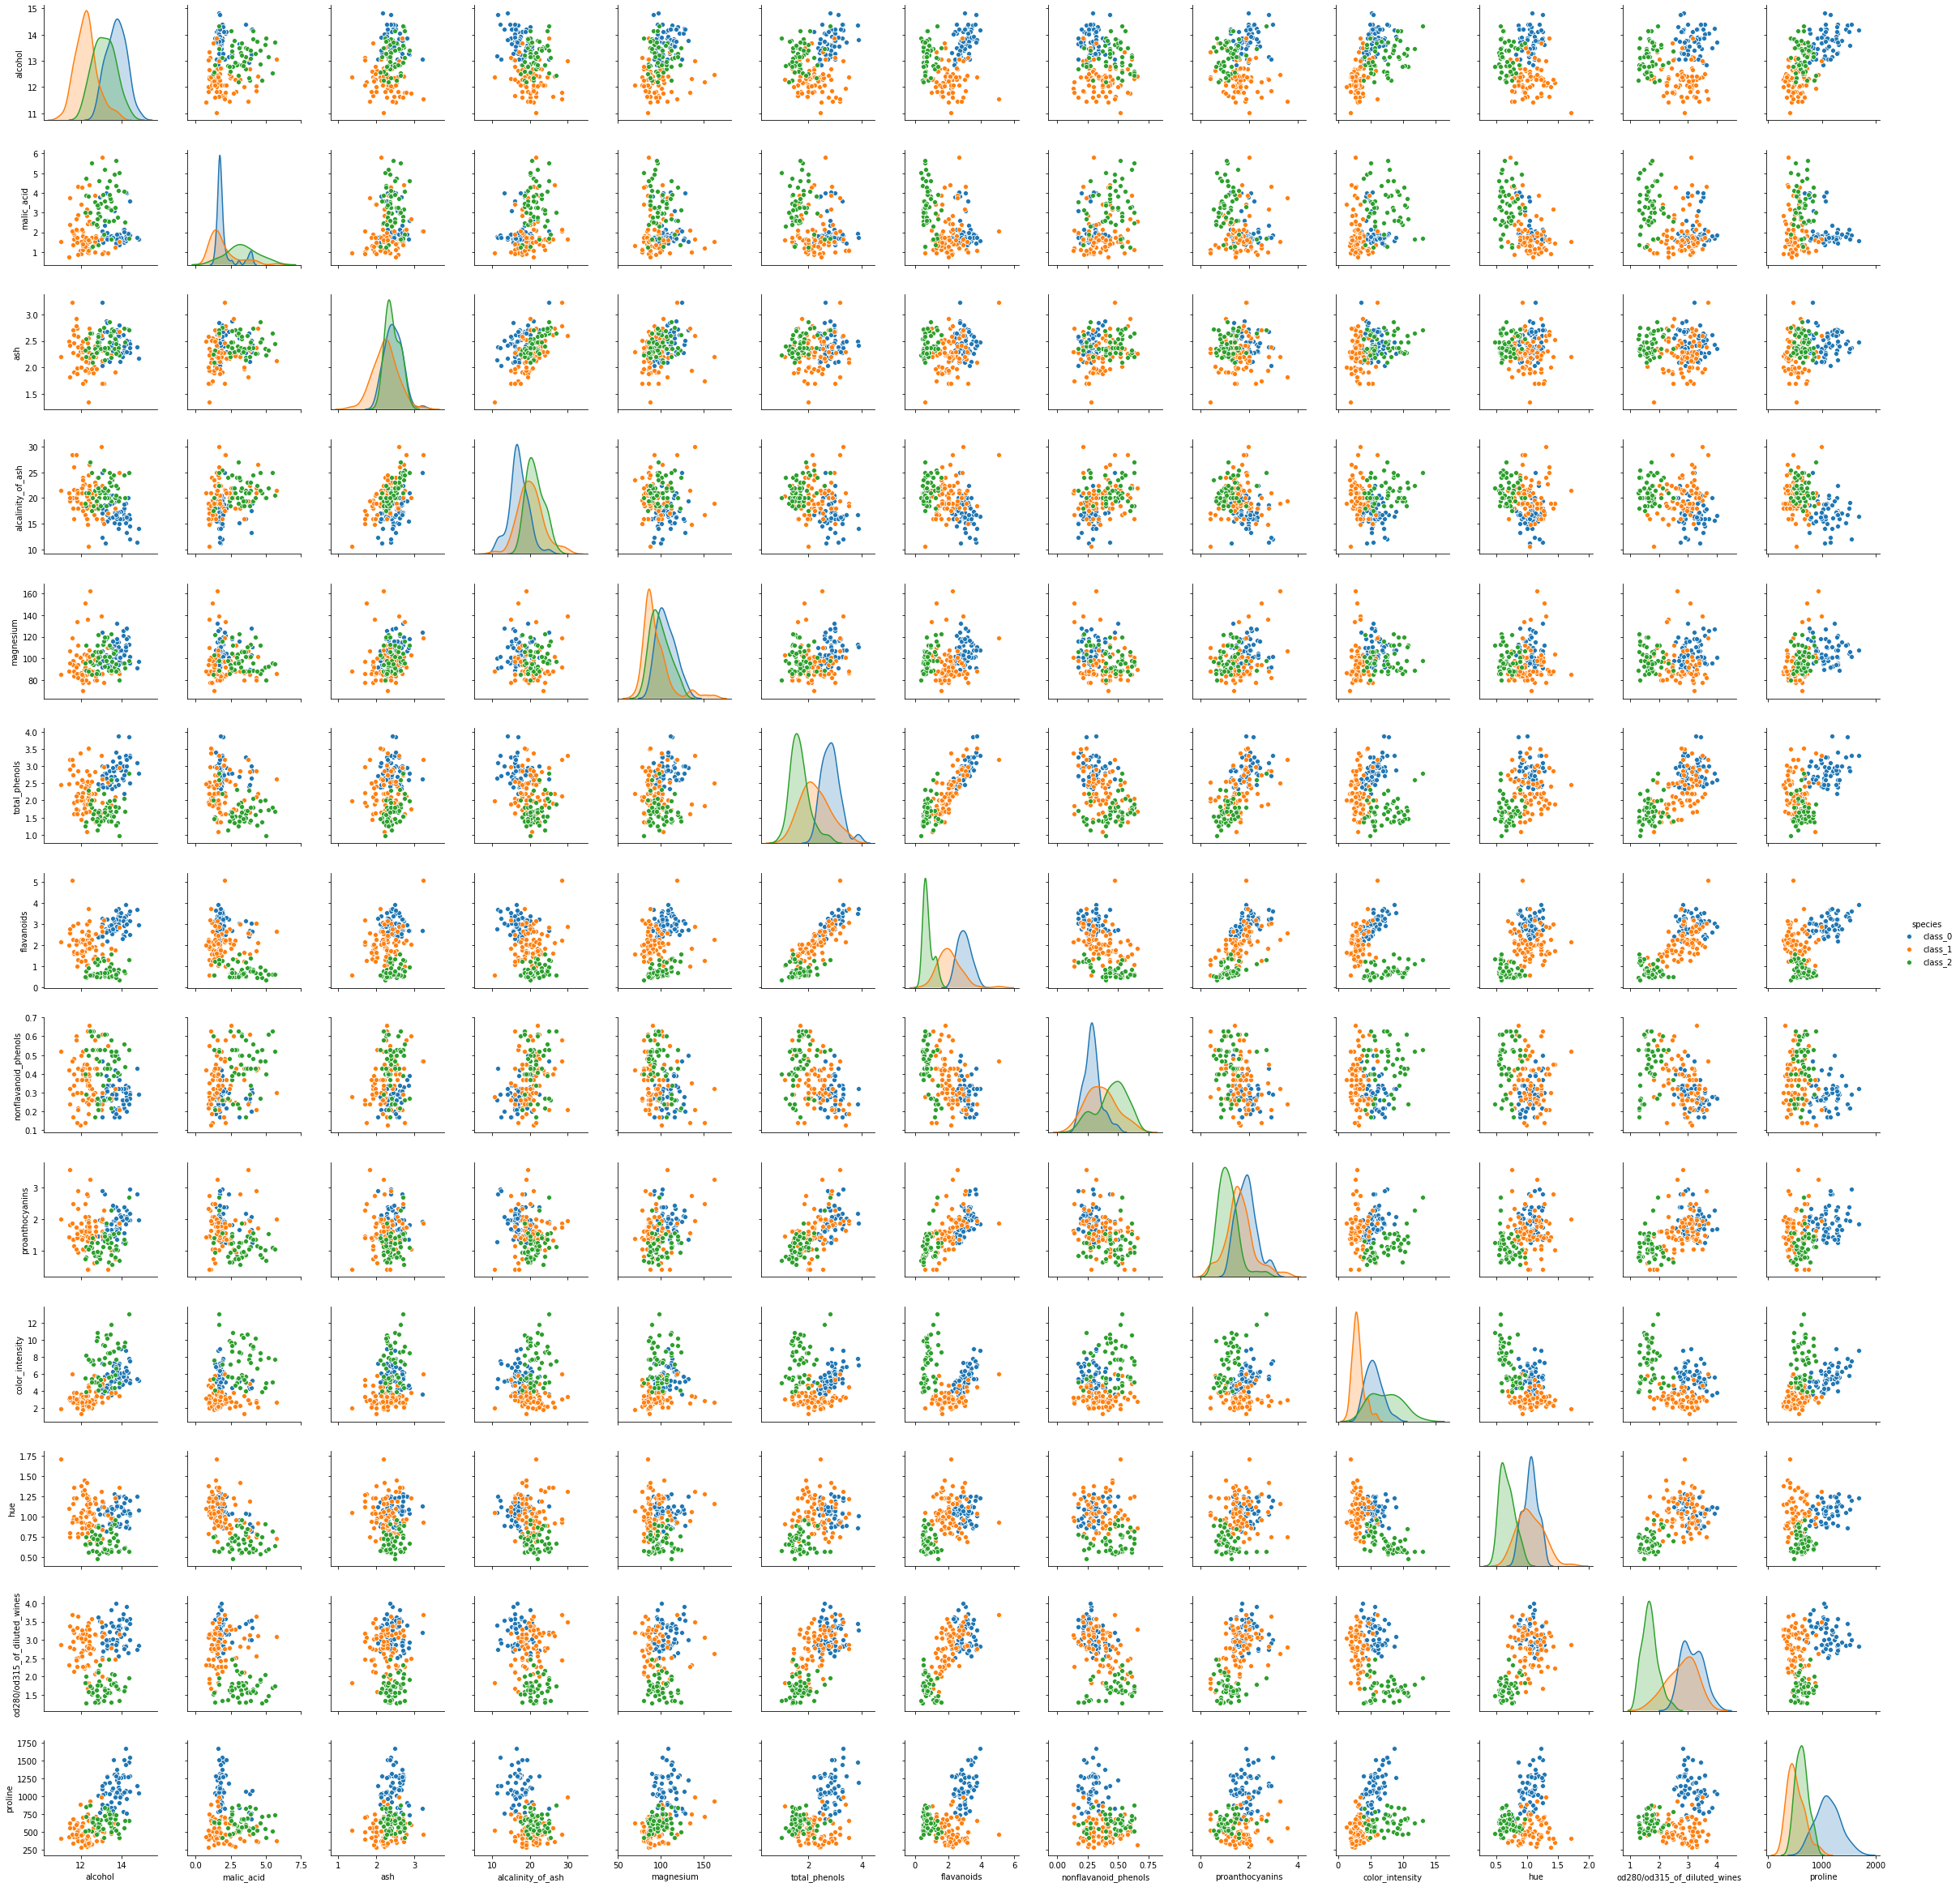

In [136]:
print("ZOBRAZOWANIE ZBIORU DANYCH:")
# konwersja na obiekt pandas.DataFrame
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# funkcja, która zamieni wartości 0,1,2 na opis tekstowy dla gatunku wina
targets = map(lambda x: wine['target_names'][x], wine['target'])

# doklejenie informacji o gatunku do reszty DataFrame
wine_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(wine_df, hue='species')
plt.show()

In [118]:
# Zobaczmy jak naocznie wyglądają dane dla 10 cech + informacja o gatunku
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,class_0


In [ ]:
print("PODZIAŁ ZBIORU DANYCH NA UCZĄCY I TESTOWY - na przykładzie dwóch cech.\n")

# Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Uczymy klasyfikator na tylko dwóch wybranych cechach
print("Wytrenowanie klasyfikatora: knn.fit(X_train[:, [0, 2]], y_train)")
knn.fit(X_train[:, [0, 2]], y_train)

print("Dokonanie predykcji: Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])")
# Przewidujemy każdy punkt na płaszczyźnie
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print("Wizualizacja:")
# Tworzymy contourplot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

In [142]:
print("PODZIAŁ ZBIORU DANYCH NA UCZĄCY I TESTOWY\n")

print("1. Dzielimy zbiór na cechy i etykiety.")
X = digits.data;
y = digits.target;  
print("2. Dzielimy zbiór na uczący i testowy.")  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("3. Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów.")
knn = KNeighborsClassifier(n_neighbors = 5)
print("4. Uczymy klasyfikator na zbiorze uczącym.")      
knn.fit(X_train, y_train)
print("5. Sprawdzamy dokładność klasyfikatora.")
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
print("6. Sprawdzamy wynik klasyfikacji dla pierwszych 10 elementów: ", y_pred[:10])

PODZIAŁ ZBIORU DANYCH NA UCZĄCY I TESTOWY

1. Dzielimy zbiór na cechy i etykiety.
2. Dzielimy zbiór na uczący i testowy.
3. Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów.
4. Uczymy klasyfikator na zbiorze uczącym.
5. Sprawdzamy dokładność klasyfikatora.
6. Sprawdzamy wynik klasyfikacji dla pierwszych 10 elementów:  [2 1 2 5 8 3 9 6 4 4]


In [146]:
print("RAPORT Z UCZENIA DANYCH:")
print("Raport pokazuje jak bardzo wyniki różnią się od prawdziwych wartości dla 10 elementów.\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy jest bliskie 1, zatem można uznać, że klasyfikator jest dobrze dobrany.")

RAPORT Z UCZENIA DANYCH:
Raport pokazuje jak bardzo wyniki różnią się od prawdziwych wartości dla 10 elementów.

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  1  0  1  1  0]
 [ 0  0  0  0 54  0  0  0  0  1]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  2  0  0  0  0 53  0]
 [ 0  0  0  2  0  2  0  0  1 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        48
           3       0.93      0.94      0.94        54
           4       1.00      0.98      0.99        55
           5       0.95      0.98      0.97        57
           6       1.00      1.00      1.00        55
           7       0.98      1.00      0.99        54
           8       0.96      0.93      0.95        57
           9   